## Project of Convex Optimization

# Linear regression / Batch gradient descent (Bike Rental dataset)

## Linear regression from scratch with batch gradient descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('D:\Efrei\M1\Machine Learning\project\Bike_Rental_UCI_dataset.csv')

data.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0,Sat,0,1


- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- dayOfWeek: The name of the day
- days: Number associated to the day
- demand: Number of bike sold

Before working with our dataset, we see if there are some missing values

In [2]:
data.isnull().values.any()

False

In [3]:
#We select all columns without the last one which represent the output
X = data.iloc[:, :-1]

#We select the output/label (which is the last column)
y = data.iloc[:, -1]

We apply get_dummies function to the 'dayOfWeek' column

In [4]:
X_encod = pd.get_dummies(X, columns=['dayOfWeek'],sparse=False)

In [5]:
def standardizationFeatures(X_encod):
    sc = StandardScaler()
    X_encod_scaled = sc.fit_transform(X_encod)
    X_encod_scaled = pd.DataFrame(X_encod_scaled)
    
    return X_encod_scaled

In [6]:
X_encod_scaled = standardizationFeatures(X_encod)

Split data into training and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_encod_scaled, y, test_size = 0.2, random_state = 5)

In [8]:
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

## Implementation from scratch of linear regression with gradient descent

Cost function 𝐽(𝑤) = (1/2𝑚)∑(ℎ𝑤(𝑥(𝑖)) − 𝑦(𝑖))²


In [9]:
def cost_function(X, Y, w):
    m = len(Y)
    J = np.sum((X.dot(w) - Y) ** 2)/(2 * m)
    return J

Gradient descent function with default value for alpha and iterations

Initialize a matrix with the size of the number of iterations with only 0 inside, that will stock the cost function (we will later use it for plotting the evolution of the cost function.

- Number of iteration by default : 1000
- Learning rate by default : 0.03

In [10]:
 def gradient_descent(X, Y, w, alpha = 0.03, iterations = 1000):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Values of hypothesis
        h = X.dot(w)
        # The difference between the hypothesiss and the actual Y
        loss = h - Y
        # Calculation of gradient
        gradient = X.T.dot(loss) / m
        # Change values of w(omega) using gradient
        w = w - alpha * gradient
        # Cost value, the new one
        cost = cost_function(X, Y, w)
        cost_history[iteration] = cost
        
    return w, cost_history

In [11]:
# Initial coefficients of omega
w = np.zeros(X_train.shape[1])

In [12]:
#Learning rate
alpha = 0.03

#Number of iterations
iterations = 2000

In [13]:
newW, cost_history = gradient_descent(X_train, y_train, w, alpha, iterations)

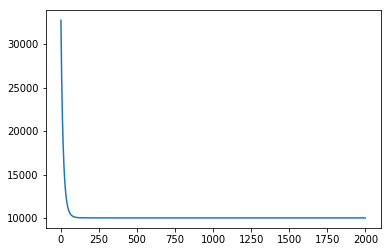

In [14]:
plt.plot(cost_history)

In [15]:
# Prediction function
def pred(x_test, newW):
    return x_test.dot(newW)

y_ = pred(X_test,newW)

Utility function to create the line for the plot

In [16]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    
    n = len(X)

    num = sum([xi*yi for xi,yi in zip(X, Y)])-n*xbar*ybar
    denum = sum([xi**2 for xi in X])-n*xbar**2

    b = num / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

Show the best fit line

best fit line:
y = 117.38 + 0.38x


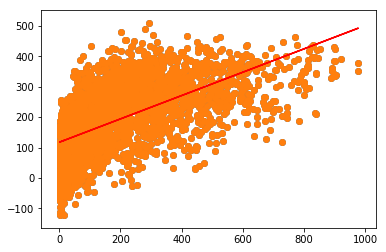

In [17]:
a, b = best_fit(y_test, y_)

plt.scatter(y_test, y_)
yfit = [a + b * xi for xi in y_test]
plt.plot(y_test, yfit,color='red')

plt.scatter(y_test, y_)

In [18]:
# R2 function
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

print(r2(y_,y_test))

0.3872671304127273


Here we have a really poor result, we did 0 feature selection/engineering, in the next part we will improve those result.

We create two functions for doing MSE and MAE

In [19]:
# Simple error
def _error(actual: np.ndarray, predicted: np.ndarray):
    return actual - predicted

In [20]:
# Mean Squared Error
def mse(actual: np.ndarray, predicted: np.ndarray):
    return np.mean(np.square(_error(actual, predicted)))

# Root Mean Squared Error
def rmse(actual: np.ndarray, predicted: np.ndarray):
    return np.sqrt(mse(actual, predicted))

print(rmse(y_, y_test))

143.7136766105492


In [21]:
# Mean Absolute Error
def mae(actual: np.ndarray, predicted: np.ndarray):
    return np.mean(np.abs(_error(actual, predicted)))

print(mae(y_, y_test))

107.43737266415583


## Implementation with Scikit learn

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [29]:
reg = model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [30]:
model.score(X_test,y_test)

0.38726430989527105

In [31]:
mean_absolute_error(y_, y_test)

107.46059458668826

In [32]:
np.sqrt(mean_squared_error(y_, y_test))

143.71400737986738

**Conclusion**

We obtain really bad R2 score :
- 0.3872671304127273
- 0.38726430989527105

Without any feature engineering, if we do some EDA and feature engineering, maybe we can try to get higher scores.

# EDA + feature selection

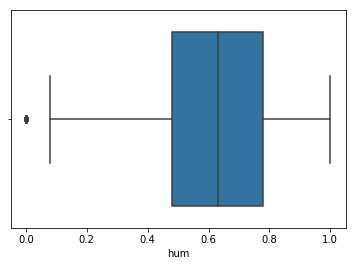

In [33]:
sns.boxplot(x="hum", data = data)

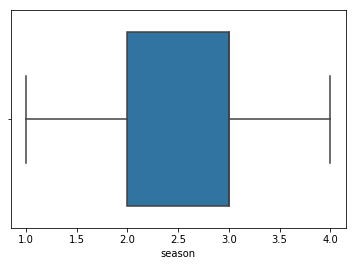

In [34]:
sns.boxplot(x="season", data = data)

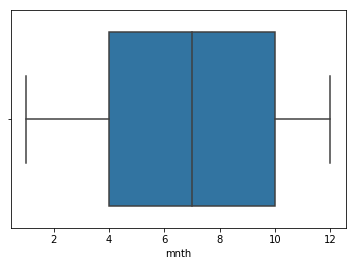

In [35]:
sns.boxplot(x="mnth", data = data)

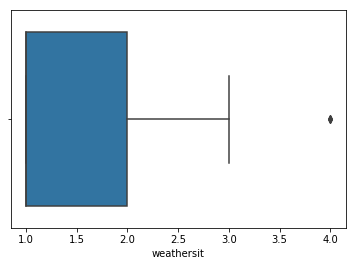

In [36]:
sns.boxplot(x="weathersit", data = data)

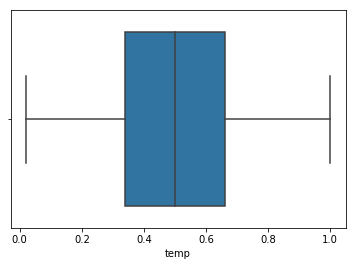

In [37]:
sns.boxplot(x="temp", data = data)

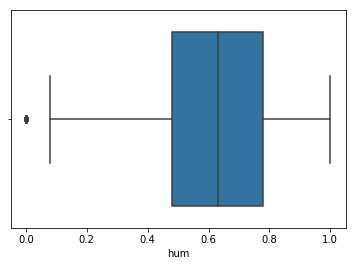

In [38]:
sns.boxplot(x="hum", data = data)

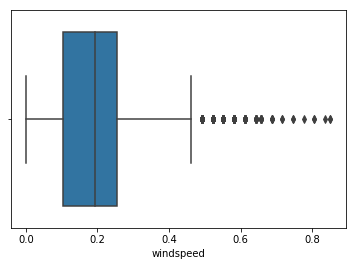

In [39]:
sns.boxplot(x="windspeed", data = data)

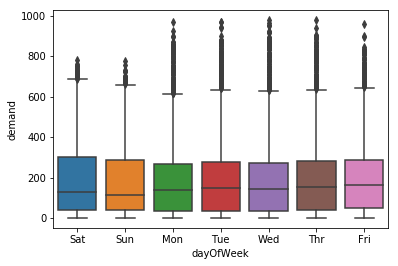

In [40]:
sns.boxplot(x="dayOfWeek", y="demand", data = data)

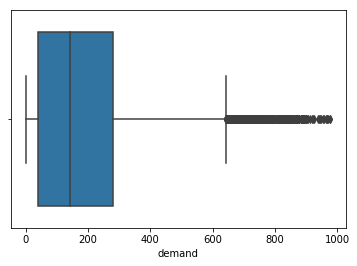

In [41]:
sns.boxplot(data["demand"])

Text(0.5,1,'Box Plot On Demand Across Hour Of The Day')

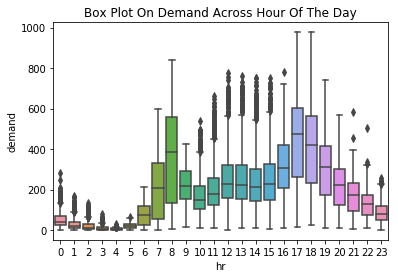

In [42]:
ax = sns.boxplot(x="hr",y="demand" , data=data)
ax.set_title("Box Plot On Demand Across Hour Of The Day")

As we can see, there are a lot of outliers values. 
We tried to remove these outliers values but we got a lower accuracy.
Indeed, there are too much outliers values, so we decided to let them

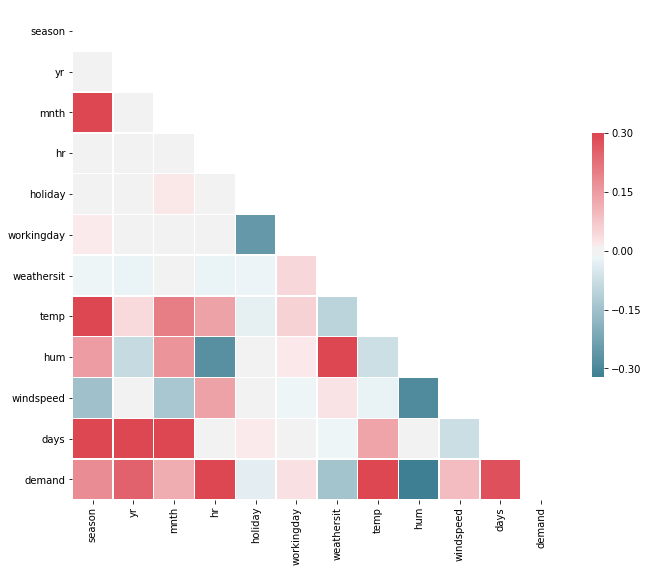

In [43]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## After feature selection/engineering

In [44]:
X_encod = pd.get_dummies(X, columns=['season','yr','mnth','hr','holiday','workingday','weathersit','dayOfWeek','days'],sparse=False)

In [45]:
X_encod_scaled = standardizationFeatures(X_encod)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_encod, y, test_size = 0.2, random_state = 5)

In [47]:
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

In [48]:
# Initial coefficients
w = np.zeros(X_train.shape[1])

In [49]:
newW, cost_history = gradient_descent(X_train, y_train, w, alpha, iterations)

In [50]:
y_ = pred(X_test,newW)

In [51]:
print(r2(y_,y_test))

0.692795221820365


## With Scikit learn

In [56]:
model = LinearRegression()

In [57]:
reg = model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [58]:
model.score(X_test,y_test)

0.7003650615483094

In [59]:
mean_absolute_error(y_, y_test)

75.93551349322351

In [60]:
np.sqrt(mean_squared_error(y_, y_test))

100.51320342288246

### Conclusion

Finally, after doing some feature engineering, we improved the R2 score by almost 2.
Indeed we get :
- 0.692795221820365 -> Batch gradient descent
- 0.7003650615483094 -> Scikitlearn